->>>> th: dtw gerarchico  > euclidean kmeans

clustering: 
1. calcolo distanze -> output: matrice distance 
2. capisco qti cluster 
3. matrice -> clustering 

4. visualizzo, ottengo statistiche, blablabla 
4,5. scelgo rappresentanti 
5. weight optimization <- ottimizzazione lineare 
6. arima e backtesting

# Load dataframe

In [46]:
# Load the cleaned S&P 500 DataFrame from a pickle file
import pandas as pd
import pickle
with open('data\pickle_files\cleaned_sp500_daily.pkl', 'rb') as file:
    df_sp500 = pickle.load(file)
    
# Fill any missing values by forward-filling and then backward-filling
df_sp500.fillna(method='ffill', inplace=True)  # Forward-fill for existing gaps
df_sp500.fillna(method='bfill', inplace=True)  # Backward-fill for leading gaps


<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\giuli\AppData\Local\Temp\ipykernel_10420\2170963958.py:4: SyntaxWarning: invalid escape sequence '\p'
  with open('data\pickle_files\cleaned_sp500_daily.pkl', 'rb') as file:
C:\Users\giuli\AppData\Local\Temp\ipykernel_10420\2170963958.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sp500.fillna(method='ffill', inplace=True)  # Forward-fill for existing gaps
C:\Users\giuli\AppData\Local\Temp\ipykernel_10420\2170963958.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sp500.fillna(method='bfill', inplace=True)  # Backward-fill for leading gaps


In [26]:
# Load the cleaned S&P 500 DataFrame from a pickle file
import pandas as pd
import pickle
with open('data\pickle_files\cleaned_sp500_daily.pkl', 'rb') as file:
    df_sp500 = pickle.load(file)
    
# Fill any missing values by forward-filling and then backward-filling
df_sp500.fillna(method='ffill', inplace=True)  # Forward-fill for existing gaps
df_sp500.fillna(method='bfill', inplace=True)  # Backward-fill for leading gaps
df_sp500

Ticker,TSLA,MLM,POOL,PAYX,JCI,GPC,CAH,AJG,DLTR,HOLX,...,RCL,PRU,GRMN,HAS,ESS,NUE,JBHT,AMAT,ACGL,PYPL
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-14 00:00:00+00:00,15.137333,98.845337,47.631180,31.855057,29.054077,65.548637,56.079235,36.220329,55.880001,23.920000,...,50.171078,52.597412,37.061481,39.956547,137.822662,38.207870,66.783379,16.996983,18.316668,36.709999
2014-10-15 00:00:00+00:00,15.313333,100.631470,47.970528,31.496561,28.512375,65.820229,55.064140,36.089497,55.240002,23.360001,...,48.691025,51.030968,37.849709,39.592178,138.176483,38.254654,66.946983,17.076080,17.916668,36.709999
2014-10-16 00:00:00+00:00,15.090000,104.286591,51.328083,31.525818,28.497742,66.423729,54.236980,35.885101,55.049999,23.150000,...,49.949516,51.660164,38.397095,39.504738,138.235413,38.628853,67.919609,17.462774,17.766666,36.709999
2014-10-17 00:00:00+00:00,15.165333,108.374489,50.801243,31.825790,29.420084,66.800919,55.357380,36.481945,56.580002,23.860001,...,51.145958,53.128288,38.127060,39.242382,137.630951,38.909504,68.092300,17.471556,18.123333,36.709999
2014-10-20 00:00:00+00:00,15.364667,110.114586,51.337040,32.008709,29.398130,67.472343,55.725842,36.694550,57.340000,24.010000,...,54.265591,53.088989,38.550365,41.180832,139.798157,39.353878,68.046844,17.638535,18.240000,36.709999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07 00:00:00+00:00,240.830002,518.650024,363.019989,136.533539,75.550003,134.990005,111.760002,286.899994,69.459999,79.879997,...,179.789993,120.459999,163.130005,72.489998,287.910004,152.750000,163.845398,200.130005,107.790001,80.260002
2024-10-08 00:00:00+00:00,244.500000,523.989990,364.940002,137.248795,76.349998,133.669998,112.620003,293.160004,69.480003,80.260002,...,183.389999,120.879997,164.630005,72.110001,288.480011,148.110001,164.902985,200.880005,109.910004,81.160004
2024-10-09 00:00:00+00:00,241.050003,531.159973,365.739990,138.917709,77.699997,133.759995,114.540001,294.940002,69.629997,80.120003,...,193.029999,122.120003,165.309998,72.239998,288.190002,151.820007,165.711136,205.059998,113.089996,81.650002


In [48]:
# Take the first 10 timestamps from df_sp500
df_sp500_first10 = df_sp500.iloc[:10]  # This selects the first 10 rows
# Transpose the DataFrame
df_sp500_transposed = df_sp500_first10.T  
print(df_sp500_transposed) 



Date    2014-10-14 00:00:00+00:00  2014-10-15 00:00:00+00:00  \
Ticker                                                         
TSLA                    15.137333                  15.313333   
MLM                     98.845337                 100.631470   
POOL                    47.631180                  47.970528   
PAYX                    31.855057                  31.496561   
JCI                     29.054077                  28.512375   
...                           ...                        ...   
NUE                     38.207870                  38.254654   
JBHT                    66.783379                  66.946983   
AMAT                    16.996983                  17.076080   
ACGL                    18.316668                  17.916668   
PYPL                    36.709999                  36.709999   

Date    2014-10-16 00:00:00+00:00  2014-10-17 00:00:00+00:00  \
Ticker                                                         
TSLA                    15.090000      

In [49]:
# Assuming df_sp500 contains stock prices with Date as index and tickers as columns
df = df_sp500_transposed.copy()

# Clustering Class

In [31]:
import time
import numpy as np
import pandas as pd
from typing import Union, Dict, Optional
from fastdtw import fastdtw
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
from joblib import Parallel, delayed  # For parallel distance computations


class TimeSeriesClustering:
    def __init__(self, df: pd.DataFrame, random_state: Optional[int] = 42):
        """
        Initialize clustering object with validation

        Args:
            df: DataFrame with rows as time series (tickers) and columns as timestamps
            random_state: Seed for reproducibility
        """
        self.random_state = random_state
        self.rng = check_random_state(random_state)
        
        # Validate and store data
        self._validate_data(df)
        self.raw_data = df.copy()
        self.processed_data = None
        self.distance_matrices = {}  # Cache for distance matrices

    def _validate_data(self, df: pd.DataFrame) -> None:
        """Comprehensive data validation"""
        if not isinstance(df, pd.DataFrame):
            raise TypeError("Input must be a pandas DataFrame")
            
        if df.empty:
            raise ValueError("Input DataFrame is empty")
            
        if not df.apply(lambda s: pd.api.types.is_numeric_dtype(s)).all():
            raise ValueError("All DataFrame columns must be numeric")
            
        if df.isna().any().any():
            raise ValueError("Data contains missing values. Handle missing values first.")
            
        if np.isinf(df.values).any():
            raise ValueError("Data contains infinite values")

    def preprocess(self, method: str = 'pct_change', **kwargs) -> None:
        """
        Preprocess time series data with proper look-forward protection
        
        Args:
            method: Preprocessing method ('pct_change' or 'standardize')
            kwargs: Additional arguments for preprocessing
        """
        if method == 'pct_change':
            # Compute percentage change across time (axis=1)
            processed = self.raw_data.pct_change(axis=1, **kwargs)
            
            # Handle NaNs by forward filling (no look-ahead bias)
            processed = processed.ffill(axis=1).bfill(axis=1)  # Handle initial NaN
            
        elif method == 'standardize':
            # Z-score standardization per time series
            means = self.raw_data.mean(axis=1)
            stds = self.raw_data.std(axis=1)
            processed = (self.raw_data.sub(means, axis=0)).div(stds, axis=0)
            
        elif method == 'returns_standardize':
            # First compute returns
            returns = self.raw_data.pct_change(axis=1, **kwargs)
            # Then standardize the returns
            means = returns.mean(axis=1)
            stds = returns.std(axis=1)
            processed = (returns.sub(means, axis=0)).div(stds, axis=0)
            processed = processed.ffill(axis=1).bfill(axis=1)
            
        else:
            raise ValueError(f"Unknown preprocessing method: {method}")
        
        self.processed_data = processed.dropna(axis=1)  # Remove columns with remaining NaNs

    def _compute_distance_matrix(self, metric: str = 'euclidean', **dtw_args) -> np.ndarray:
        """
        Compute distance matrix with caching and parallel processing
        
        Args:
            metric: Distance metric ('euclidean' or 'fastdtw')
            dtw_args: Additional arguments for FastDTW
        """
        if metric not in ['euclidean', 'fastdtw']:
            raise ValueError(f"Unsupported distance metric: {metric}")

        # Check cache first
        cache_key = f"{metric}_{hash(frozenset(dtw_args.items()))}"
        if cache_key in self.distance_matrices:
            return self.distance_matrices[cache_key]

        data = self.processed_data.values
        
        if metric == 'euclidean':
            distances = pdist(data, metric='euclidean')
        else:
            # Parallel FastDTW computation
            n_samples = data.shape[0]
            indices = np.triu_indices(n_samples, k=1)
            
            def _parallel_dtw(i, j):
                return fastdtw(data[i], data[j], **dtw_args)[0]

            results = Parallel(n_jobs=-1)(
                delayed(_parallel_dtw)(i, j) 
                for i, j in zip(indices[0], indices[1])
            )
            
            distances = np.array(results)

        # Cache and return squareform matrix
        self.distance_matrices[cache_key] = squareform(distances)
        return self.distance_matrices[cache_key]

    def hierarchical_clustering(
        self,
        n_clusters: int,
        metric: str = 'euclidean',
        linkage_method: str = 'ward',
        **dtw_args
    ) -> Dict:
        """Hierarchical clustering with automatic method selection"""
        if metric == 'fastdtw' and linkage_method == 'ward':
            raise ValueError("Ward linkage can't be used with non-Euclidean distances")

        distance_matrix = self._compute_distance_matrix(metric, **dtw_args)
        Z = linkage(distance_matrix, method=linkage_method)
        clusters = fcluster(Z, n_clusters, criterion='maxclust')
        
        # Silhouette score calculation
        sil_score = self._calculate_silhouette(clusters, distance_matrix, metric)
        
        return {
            'linkage_matrix': Z,
            'clusters': clusters,
            'silhouette_score': sil_score,
            'n_clusters': len(np.unique(clusters))
        }

    def kmeans_clustering(
        self,
        n_clusters: int,
        init: str = 'k-means++',
        n_init: int = 10,
        **kwargs
    ) -> Dict:
        """KMeans clustering with proper initialization"""
        model = KMeans(
            n_clusters=n_clusters,
            init=init,
            n_init=n_init,
            random_state=self.random_state,
            **kwargs
        )
        
        clusters = model.fit_predict(self.processed_data.values)
        
        return {
            'clusters': clusters,
            'silhouette_score': silhouette_score(
                self.processed_data.values, 
                clusters,
                metric='euclidean'
            ),
            'inertia': model.inertia_,
            'n_clusters': n_clusters
        }

    def dbscan_clustering(
        self,
        eps: float,
        min_samples: int = 5,
        metric: str = 'euclidean',
        **dtw_args
    ) -> Dict:
        """DBSCAN clustering with proper distance matrix handling"""
        distance_matrix = self._compute_distance_matrix(metric, **dtw_args)
        model = DBSCAN(
            eps=eps,
            min_samples=min_samples,
            metric='precomputed',
            n_jobs=-1
        )
        
        clusters = model.fit_predict(distance_matrix)
        n_clusters = len(np.unique(clusters)) - (1 if -1 in clusters else 0)
        
        return {
            'clusters': clusters,
            'silhouette_score': self._calculate_silhouette(clusters, distance_matrix, metric),
            'n_clusters': n_clusters,
            'core_sample_indices': model.core_sample_indices_
        }

    def _calculate_silhouette(
        self,
        clusters: np.ndarray,
        distance_matrix: np.ndarray,
        metric: str
    ) -> float:
        """Safe silhouette score calculation"""
        unique_clusters = np.unique(clusters)
        if len(unique_clusters) < 2:
            return np.nan
        
        # Handle noise points in DBSCAN
        mask = clusters != -1 if -1 in clusters else slice(None)
        
        if metric == 'euclidean':
            return silhouette_score(
                self.processed_data.values[mask],
                clusters[mask],
                metric='euclidean'
            )
        else:
            return silhouette_score(
                distance_matrix[mask][:, mask],
                clusters[mask],
                metric='precomputed'
            )

    def plot_elbow(self, max_clusters: int = 15) -> None:
        """Improved elbow method with automatic knee detection"""
        inertias = []
        for k in range(1, max_clusters + 1):
            model = KMeans(
                n_clusters=k,
                random_state=self.random_state,
                n_init='auto'
            ).fit(self.processed_data.values)
            inertias.append(model.inertia_)

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, max_clusters + 1), inertias, 'bo-')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Inertia')
        plt.title('Elbow Method for Optimal K')
        plt.grid(True)
        plt.show()

    def plot_dendrogram(
        self,
        linkage_matrix: np.ndarray,
        title: str = "Hierarchical Clustering Dendrogram",
        **kwargs
    ) -> None:
        """Enhanced dendrogram visualization"""
        plt.figure(figsize=(15, 8))
        dendrogram(
            linkage_matrix,
            labels=self.processed_data.index.tolist(),
            orientation='top',
            **kwargs
        )
        plt.title(title)
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    def analyze_clusters(self, clusters: np.ndarray) -> pd.DataFrame:
        """Comprehensive cluster analysis"""
        analysis = []
        for cluster_id in np.unique(clusters):
            mask = clusters == cluster_id
            cluster_data = self.raw_data[mask]
            
            stats = {
                'cluster': cluster_id,
                'size': cluster_data.shape[0],
                'mean_return': cluster_data.pct_change(axis=1).mean().mean(),
                'volatility': cluster_data.pct_change(axis=1).std().mean(),
                'total_return': (cluster_data.iloc[:, -1] / cluster_data.iloc[:, 0] - 1).mean()
            }
            
            analysis.append(stats)
            
        return pd.DataFrame(analysis).set_index('cluster')


In [32]:
# Initialize the DTWClustering with the sliced DataFrame
clustering = TimeSeriesClustering(df)
clustering.preprocess(method='pct_change')



# Apply DTW-Hierarchical

In [50]:
# Hierarchical Clustering with FastDTW Distance
print("\nHierarchical Clustering with FastDTW Distance:")
hierarchical_dtw= clustering.hierarchical_clustering(
    n_clusters=2, metric='fastdtw', linkage_method='complete' 
)



Hierarchical Clustering with FastDTW Distance:


C:\Users\giuli\AppData\Local\Temp\ipykernel_10420\3546897724.py:136: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method=linkage_method)


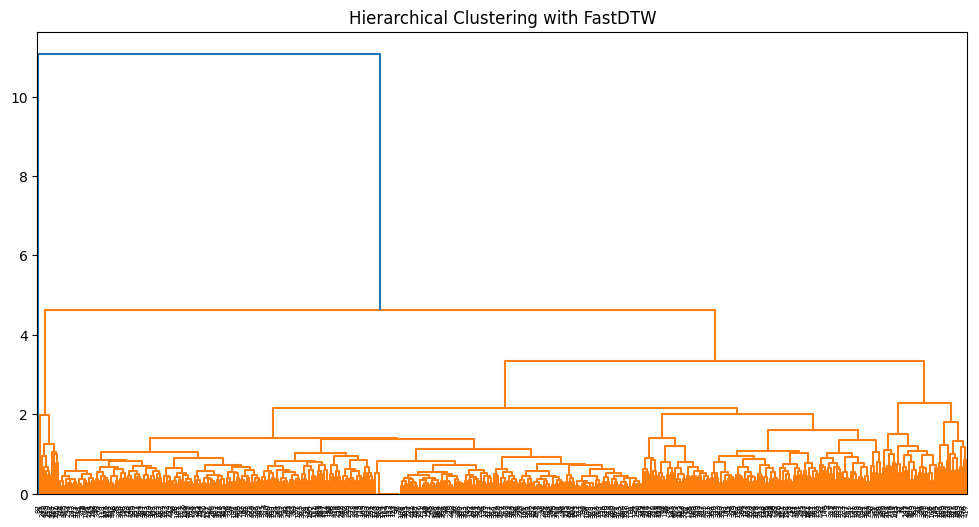

In [34]:
# Hierarchical Clustering with FastDTW Distance
print("\nHierarchical Clustering with FastDTW Distance:")
hierarchical_dtw= clustering.hierarchical_clustering(
    n_clusters=2, metric='fastdtw', linkage_method='complete' 
)
# dendrogram
dtw_Z = hierarchical_dtw['linkage_matrix']
plt.figure(figsize=(12, 6))
dendrogram(dtw_Z)
plt.title('Hierarchical Clustering with FastDTW')
plt.show()


In [51]:
#select the number of clusters from the dendrogram and print the results
number_of_cluster = 2  # Adjust this based on the dendrogram
# Perform hierarchical clustering again with the selected number of clusters
print("\nHierarchical Clustering Results with FastDTW Distance:")
hierarchical_dtw= clustering.hierarchical_clustering(
    n_clusters=number_of_cluster, metric='fastdtw', linkage_method='complete' 
)
dtw_clusters = hierarchical_dtw['clusters']-1
dtw_silhouette = hierarchical_dtw['silhouette_score']
print(f"Silhouette Score: {dtw_silhouette:.4f}")
print(f"Number of Clusters: {hierarchical_dtw['n_clusters']}")
print(dtw_clusters)


Hierarchical Clustering Results with FastDTW Distance:
Silhouette Score: 0.7660
Number of Clusters: 2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

C:\Users\giuli\AppData\Local\Temp\ipykernel_10420\3546897724.py:136: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method=linkage_method)


# Apply K-means Euclidean

In [52]:
# KMeans Clustering with Euclidean Distance
print("\nKMeans Clustering with Euclidean Distance:")
kmeans_euclidean = clustering.kmeans_clustering(
    n_clusters=2, init='k-means++', n_init=10
)




KMeans Clustering with Euclidean Distance:


In [53]:
# results
kmeans_clusters = kmeans_euclidean['clusters']
kmeans_silhouette = kmeans_euclidean['silhouette_score']
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Number of Clusters: {kmeans_euclidean['n_clusters']}")
print(kmeans_clusters)


Silhouette Score: 0.2406
Number of Clusters: 2
[0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0
 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1
 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0
 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0
 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1]


# Analyse results of both clustering methods

In [54]:

# Analyze clusters for both hierarchical methods
print("\nCluster Analysis for Euclidean Hierarchical Clustering:")
euclidean_analysis = clustering.analyze_clusters(kmeans_euclidean['clusters'])
print(euclidean_analysis)

print("\nCluster Analysis for FastDTW Hierarchical Clustering:")
fastdtw_analysis = clustering.analyze_clusters(hierarchical_dtw['clusters'])
print(fastdtw_analysis)


Cluster Analysis for Euclidean Hierarchical Clustering:
         size  mean_return  volatility  total_return
cluster                                             
0         141     0.010231    0.017202      0.094871
1         328     0.004682    0.012288      0.042595

Cluster Analysis for FastDTW Hierarchical Clustering:
         size  mean_return  volatility  total_return
cluster                                             
1         468     0.006304    0.014878      0.057888
2           1     0.027988         NaN      0.256214


In [57]:
#creating df_actual and df_pct dataframes
df_actual=df
df_actual_new=df_actual.iloc[:, 1:] #drop the first column (timestamp)
df_actual_new
df_pct=df_actual.pct_change(axis=1)
df_pct.dropna(axis=1, inplace=True)
print(df_pct)
print(df_actual_new)

Date    2014-10-15 00:00:00+00:00  2014-10-16 00:00:00+00:00  \
Ticker                                                         
TSLA                     0.011627                  -0.014584   
MLM                      0.018070                   0.036322   
POOL                     0.007124                   0.069992   
PAYX                    -0.011254                   0.000929   
JCI                     -0.018645                  -0.000513   
...                           ...                        ...   
NUE                      0.001224                   0.009782   
JBHT                     0.002450                   0.014528   
AMAT                     0.004654                   0.022645   
ACGL                    -0.021838                  -0.008372   
PYPL                     0.000000                   0.000000   

Date    2014-10-17 00:00:00+00:00  2014-10-20 00:00:00+00:00  \
Ticker                                                         
TSLA                     0.004992      

In [59]:
#transpose the clusters for better readability
kmeans_clusters_transposed=kmeans_clusters.T
dtw_clusters_transposed=dtw_clusters.T
#create a new dataframe with the clusters as columns and the tickers as index
clustering_columns = pd.DataFrame({
    'kmeans': kmeans_clusters,
    'dtw': dtw_clusters,
})
clustering_columns


,kmeans,dtw
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0
...,...,...
464,1,0
465,1,0
466,0,0
467,1,0


In [ ]:
# Merge the clustering results with the original DataFrame
df_actual_new['kmeans'] = kmeans_clusters
df_actual_new['dtw'] = dtw_clusters
df_actual_new



Date,2014-10-15 00:00:00+00:00,2014-10-16 00:00:00+00:00,2014-10-17 00:00:00+00:00,2014-10-20 00:00:00+00:00,2014-10-21 00:00:00+00:00,2014-10-22 00:00:00+00:00,2014-10-23 00:00:00+00:00,2014-10-24 00:00:00+00:00,2014-10-27 00:00:00+00:00,kmeans,dtw
Ticker,,,,,,,,,,,
TSLA,15.313333,15.090000,15.165333,15.364667,15.689333,15.406667,15.686000,15.682667,14.778000,0,0
MLM,100.631470,104.286591,108.374489,110.114586,111.458763,109.838356,111.845474,113.180481,111.053703,0,0
POOL,47.970528,51.328083,50.801243,51.337040,52.194275,51.560272,52.087135,51.595978,51.515621,0,0
PAYX,31.496561,31.525818,31.825790,32.008709,32.689106,32.711060,32.930553,33.281738,33.486584,1,0
JCI,28.512375,28.497742,29.420084,29.398130,29.939829,29.469252,30.167761,30.579508,30.439816,1,0
...,...,...,...,...,...,...,...,...,...,...,...
NUE,38.254654,38.628853,38.909504,39.353878,40.297188,40.312782,39.852818,41.154739,40.694775,1,0
JBHT,66.946983,67.919609,68.092300,68.046844,69.937569,69.792099,70.482941,70.301147,71.155602,1,0
AMAT,17.076080,17.462774,17.471556,17.638535,18.262526,18.007656,18.367979,18.447090,18.491028,0,0


In [61]:
# Merge the clustering results with the percentage change DataFrame
df_pct['kmeans'] = kmeans_clusters
df_pct['dtw'] = dtw_clusters
df_pct

Date,2014-10-15 00:00:00+00:00,2014-10-16 00:00:00+00:00,2014-10-17 00:00:00+00:00,2014-10-20 00:00:00+00:00,2014-10-21 00:00:00+00:00,2014-10-22 00:00:00+00:00,2014-10-23 00:00:00+00:00,2014-10-24 00:00:00+00:00,2014-10-27 00:00:00+00:00,kmeans,dtw
Ticker,,,,,,,,,,,
TSLA,0.011627,-0.014584,0.004992,0.013144,0.021131,-0.018016,0.018131,-0.000212,-0.057686,0,0
MLM,0.018070,0.036322,0.039199,0.016056,0.012207,-0.014538,0.018273,0.011936,-0.018791,0,0
POOL,0.007124,0.069992,-0.010264,0.010547,0.016698,-0.012147,0.010218,-0.009430,-0.001557,0,0
PAYX,-0.011254,0.000929,0.009515,0.005747,0.021257,0.000672,0.006710,0.010664,0.006155,1,0
JCI,-0.018645,-0.000513,0.032365,-0.000746,0.018426,-0.015717,0.023703,0.013649,-0.004568,1,0
...,...,...,...,...,...,...,...,...,...,...,...
NUE,0.001224,0.009782,0.007265,0.011421,0.023970,0.000387,-0.011410,0.032668,-0.011176,1,0
JBHT,0.002450,0.014528,0.002543,-0.000668,0.027786,-0.002080,0.009899,-0.002579,0.012154,1,0
AMAT,0.004654,0.022645,0.000503,0.009557,0.035377,-0.013956,0.020009,0.004307,0.002382,0,0


In [62]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_cluster_timeseries(df_actual, df_pct, clustering_columns):
    """
    Plots the time series of tickers in each cluster for both actual values and pct change values.
    
    Args:
    - df_actual (pd.DataFrame): Dataframe containing actual values with tickers as rows and timestamps as columns.
    - df_pct (pd.DataFrame): Dataframe containing percentage change values with tickers as rows and timestamps as columns.
    - clustering_columns (list): List of column names corresponding to the clustering algorithms.
    
    Returns:
    - None
    """
    
    # Iterate over each clustering type (one column for each clustering algorithm)
    for clustering_col in clustering_columns:
        # Get unique clusters
        clusters = df_actual[clustering_col].unique()
        num_clusters = len(clusters)

        # Set number of rows and columns: 2 rows per cluster (one for actual, one for pct change)
        nrows = num_clusters  # One row per cluster
        ncols = 2  # Two columns (one for actual, one for pct change)

        # Create figure with appropriate size
        plt.figure(figsize=(18, 5 * num_clusters))  # Adjust the size for multiple rows

        plt.suptitle(f"Cluster Timeseries for {clustering_col}", fontsize=16)

        # Plot actual values for each cluster (first column)
        for idx, cluster in enumerate(clusters):
            tickers_in_cluster = df_actual[df_actual[clustering_col] == cluster].index
            df_cluster_actual = df_actual.loc[tickers_in_cluster].drop(columns=[clustering_col])

            if not df_cluster_actual.empty:
                ax = plt.subplot(nrows, ncols, idx * 2 + 1)  # First column for actual values
                df_cluster_actual.transpose().plot(title=f"Cluster {cluster} - Actual", ax=ax, legend = False)
                ax.set_xlabel('')  # Hide x-axis label
                ax.set_ylabel('')  # Hide y-axis label
                ax.set_xticks([])  # Remove x-axis ticks (no tick marks)
                ax.set_xticklabels([])  # Remove x-axis labels (no tick labels)
        
        # Plot pct change values for each cluster (second column)
        for idx, cluster in enumerate(clusters):
            tickers_in_cluster = df_pct[df_pct[clustering_col] == cluster].index
            df_cluster_pct = df_pct.loc[tickers_in_cluster].drop(columns=[clustering_col])

            if not df_cluster_pct.empty:
                ax = plt.subplot(nrows, ncols, idx * 2 + 2)  # Second column for pct change
                df_cluster_pct.transpose().plot(title=f"Cluster {cluster} - % Change", ax=ax, legend = False)
                ax.set_xlabel('')  # Hide x-axis label
                ax.set_ylabel('')  # Hide y-axis label
                ax.set_xticks([])  # Remove x-axis ticks (no tick marks)
                ax.set_xticklabels([])  # Remove x-axis labels (no tick labels)
        
        # Adjust layout to be more spacious
        plt.tight_layout(pad=4.0, rect=[0, 0, 1, 0.95])  # Increase the pad for more space
        plt.show()



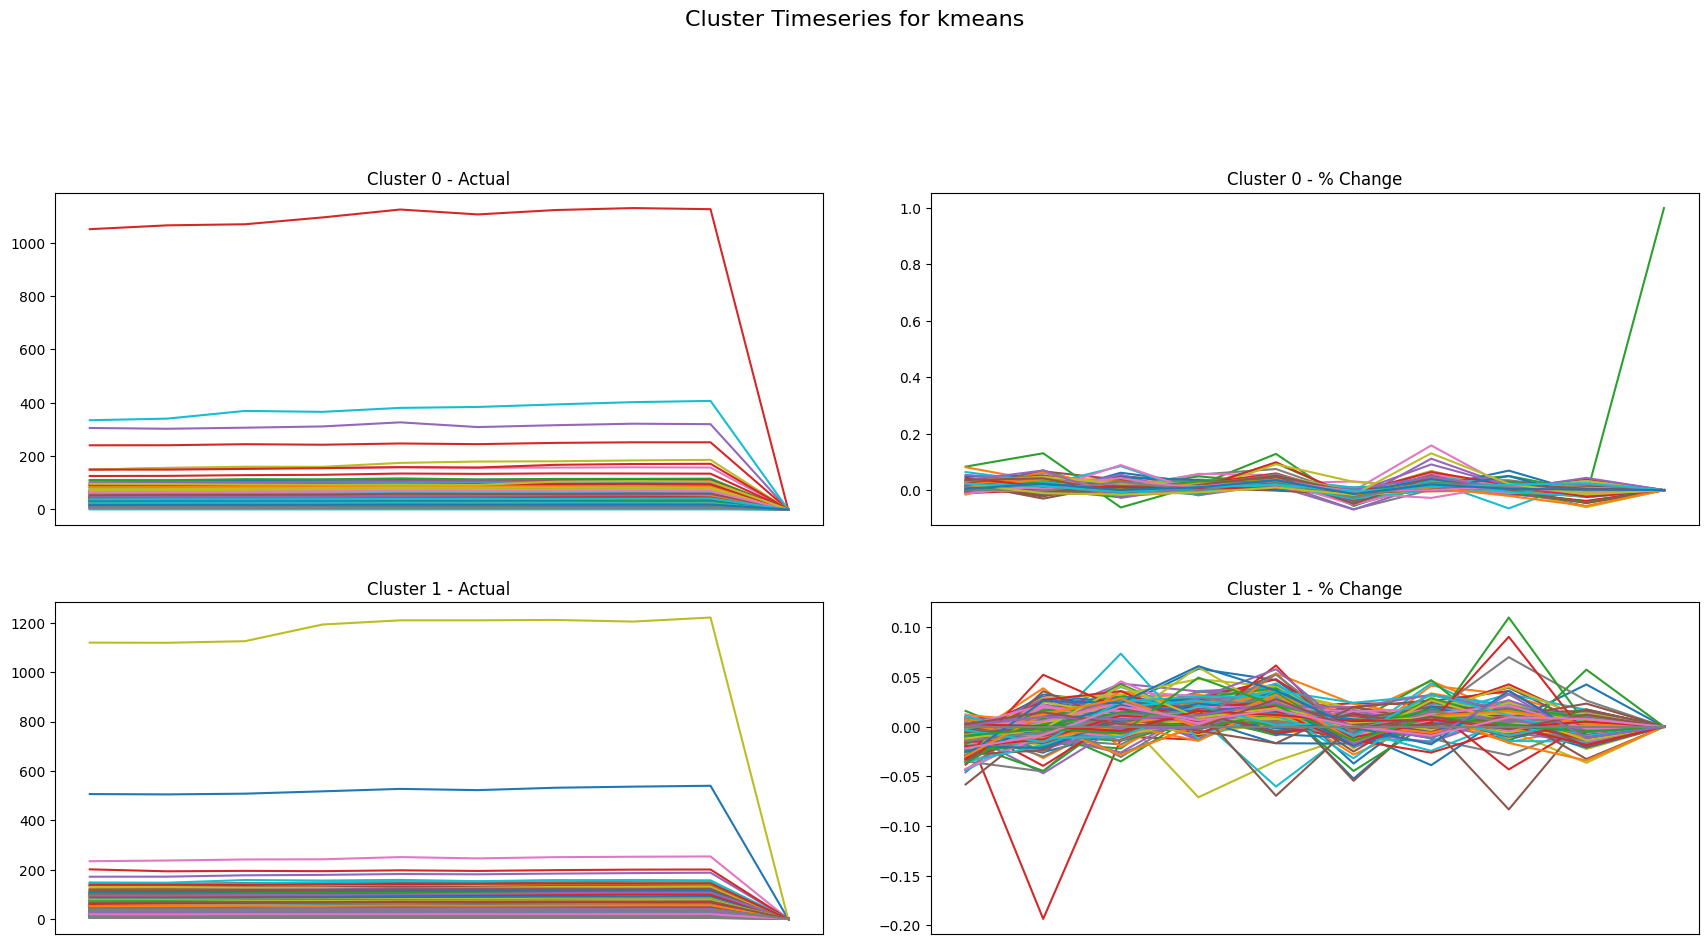

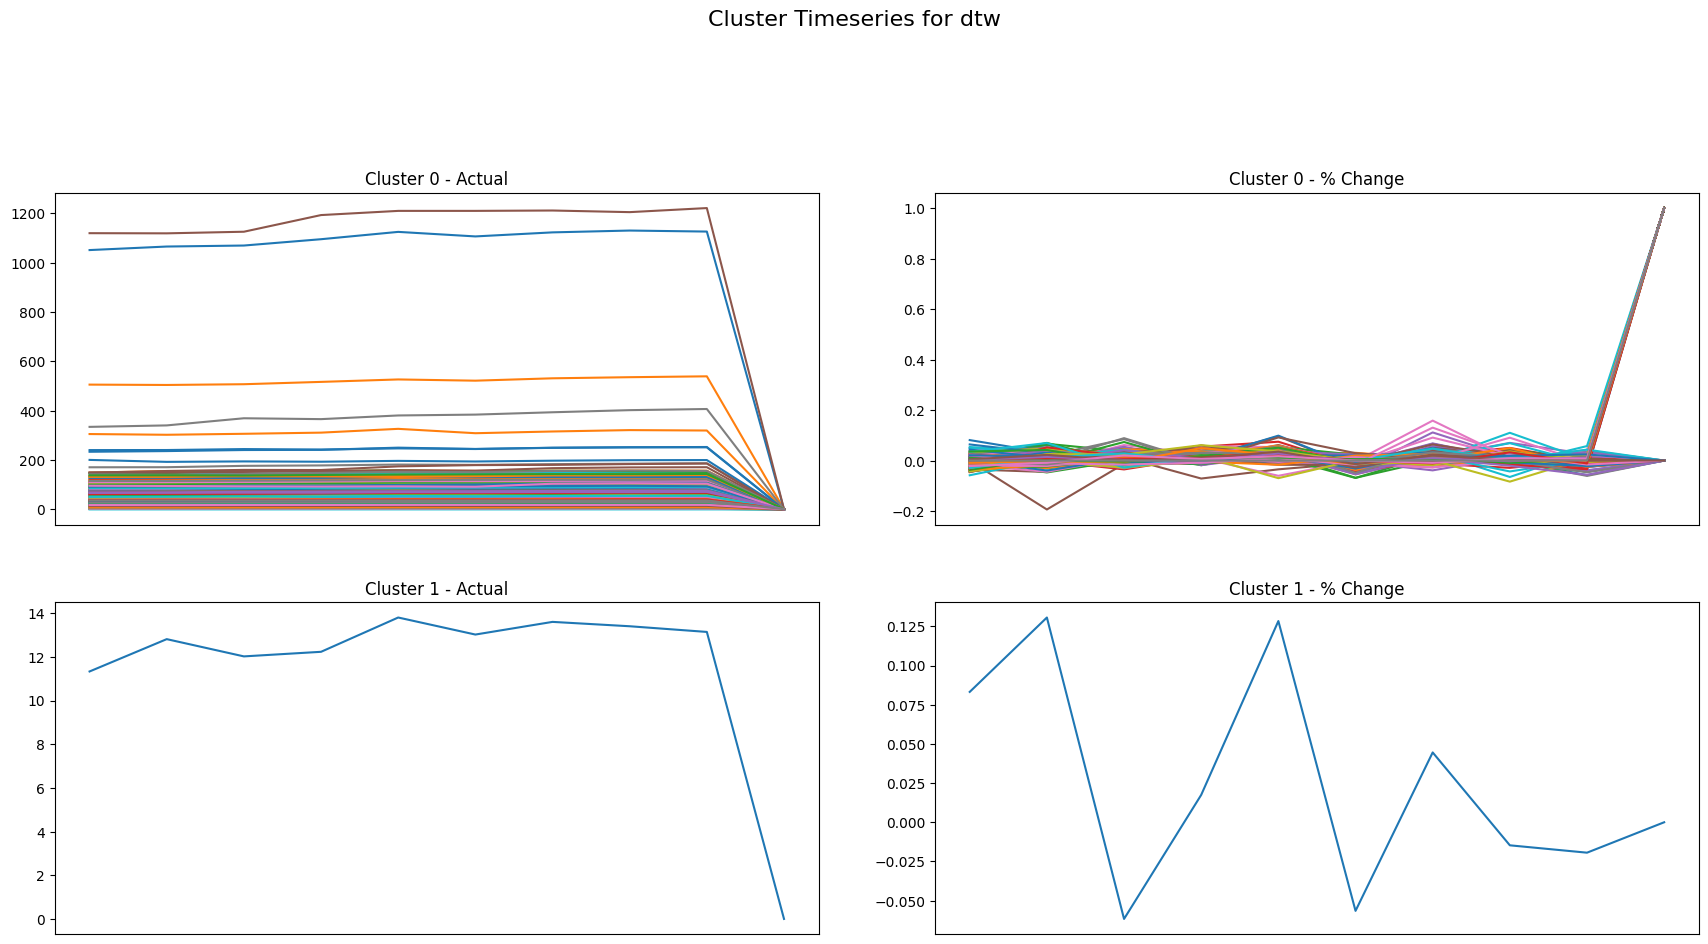

In [63]:

plot_cluster_timeseries(df_actual_new, df_pct, clustering_columns)



# Get top-n representative stocks

In [64]:
def get_representative_assets(df_timeseries, cluster_labels, top_n=5):
    """
    Seleziona le top_n azioni più vicine al centroide di ciascun cluster e restituisce una lista unica.

    Args:
        df_timeseries (pd.DataFrame): Serie temporali con tickers come indice.
        cluster_labels (array-like): Vettore dei cluster (stesso ordine del df).
        top_n (int): Numero di asset da prendere per cluster.

    Returns:
        list: Lista unica di tickers selezionati (rappresentativi).
    """
    df = df_timeseries.copy()
    df['cluster'] = cluster_labels
    representatives = []

    for cluster_id in np.unique(cluster_labels):
        df_cluster = df[df['cluster'] == cluster_id].drop(columns='cluster')
        centroid = df_cluster.mean(axis=0)
        distances = df_cluster.apply(lambda row: np.linalg.norm(row - centroid), axis=1)
        top_assets = distances.nsmallest(top_n).index.tolist()
        representatives.extend(top_assets)  # Aggiunge direttamente alla lista finale

    return representatives


In [66]:
# I decided to use the original values for the representative assets.


df_actual_no_labels = df_actual_new.drop(columns='dtw')
df_actual_no_labels = df_actual_no_labels.drop(columns='kmeans')

# Applica la funzione:
# Esempio: df_actual contiene le serie temporali, dtw_labels è il clustering
selected_stocks = get_representative_assets(df_actual, dtw_clusters, top_n=6)
print(selected_stocks)





['DLTR', 'CAH', 'TAP', 'EMN', 'CRM', 'IQV', 'ENPH']


# Weight optimization onto representative stocks

## Looking forward (next 2 months)

## Looking backwards (past timewindow used for clustering)

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import logging
from scipy.optimize import minimize

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()


def get_sp500_data(lookback_period: str) -> pd.Series:
    """
    Fetches the S&P 500 data for the specified lookback period.

    Parameters:
        lookback_period (str): Lookback period like '6m', '1y', '5y', '10y'.

    Returns:
        pd.Series: Adjusted close prices of the S&P 500.
    """
    try:
        end_date = datetime.datetime.today()
        start_date = end_date - pd.to_timedelta(lookback_period)

        logger.info(f"Fetching S&P 500 data from {start_date.date()} to {end_date.date()}")
        sp500 = web.DataReader('^SPX', data_source='stooq', start=start_date, end=end_date)
        sp500 = sp500[::-1]  # Make chronological
        return sp500['Close']
    except Exception as e:
        logger.error(f"Failed to fetch S&P 500 data: {e}")
        raise


def calculate_annual_expected_returns(price_df: pd.DataFrame) -> pd.Series:
    """
    Calculates annualized expected returns using arithmetic mean of daily returns.

    Parameters:
        price_df (pd.DataFrame): Price data.

    Returns:
        pd.Series: Annual expected returns.
    """
    daily_returns = price_df.pct_change().dropna()
    expected_daily_returns = daily_returns.mean()
    return expected_daily_returns * 252


def calculate_annual_covariance_matrix(price_df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates annualized covariance matrix of daily returns.

    Parameters:
        price_df (pd.DataFrame): Price data.

    Returns:
        pd.DataFrame: Annual covariance matrix.
    """
    daily_returns = price_df.pct_change().dropna()
    return daily_returns.cov() * 252


def optimize_min_variance_portfolio(expected_returns: pd.Series, cov_matrix: pd.DataFrame, target_return: float) -> pd.Series:
    """
    Performs minimum variance optimization subject to achieving a target return.

    Parameters:
        expected_returns (pd.Series): Annual expected returns.
        cov_matrix (pd.DataFrame): Annualized covariance matrix.
        target_return (float): Target return (e.g. that of S&P 500).

    Returns:
        pd.Series: Optimal weights.
    """
    n = len(expected_returns)
    tickers = expected_returns.index

    def objective(weights):
        return np.dot(weights.T, np.dot(cov_matrix, weights))  # Portfolio variance

    constraints = [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # Fully invested
        {'type': 'eq', 'fun': lambda w: np.dot(w, expected_returns) - target_return}  # Target return
    ]

    bounds = [(0, 1)] * n
    w0 = np.ones(n) / n

    result = minimize(objective, w0, bounds=bounds, constraints=constraints)

    if not result.success:
        logger.error(f"Optimization failed: {result.message}")
        raise RuntimeError(f"Optimization failed: {result.message}")

    return pd.Series(result.x, index=tickers)


def plot_results(sp500_data: pd.Series, portfolio_returns: pd.Series):
    """
    Plots S&P 500 index vs. portfolio returns.

    Parameters:
        sp500_data (pd.Series): S&P 500 adjusted close.
        portfolio_returns (pd.Series): Portfolio cumulative returns.
    """
    plt.figure(figsize=(10, 6))

    plt.plot(sp500_data / sp500_data.iloc[0], label='S&P 500', color='blue')
    plt.plot((1 + portfolio_returns).cumprod(), label='Optimized Portfolio', color='green')

    plt.title("Portfolio vs S&P 500 (Normalized)")
    plt.xlabel("Date")
    plt.ylabel("Growth of $1")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def main(df_sp500_optimization: pd.DataFrame, selected_stocks: list, lookback_period: str):
    """
    Runs the full pipeline: fetch data, compute returns/covariance, optimize, and plot.

    Parameters:
        df_sp500_optimization (pd.DataFrame): Price data of selected stocks.
        selected_stocks (list): List of tickers to optimize.
        lookback_period (str): Lookback period like '1y', '5y', '10y'.
    """
    try:
        # Prepare price data
        logger.info("Preparing data for optimization...")
        df_selected = df_sp500_optimization.loc[selected_stocks].transpose()

        # Calculate expected returns and covariance matrix
        logger.info("Calculating expected returns and covariance matrix...")
        annual_returns = calculate_annual_expected_returns(df_selected)
        cov_matrix = calculate_annual_covariance_matrix(df_selected)

        # Get S&P 500 expected return
        logger.info("Fetching S&P 500 data...")
        sp500_close = get_sp500_data(lookback_period)
        sp500_return = calculate_annual_expected_returns(sp500_close.to_frame()).iloc[0]

        logger.info(f"Target S&P 500 annual return: {sp500_return:.4f}")

        # Run optimization
        logger.info("Running portfolio optimization...")
        optimal_weights = optimize_min_variance_portfolio(annual_returns, cov_matrix, sp500_return)

        # Output weights
        logger.info("Optimal Portfolio Weights:")
        print(optimal_weights.sort_values(ascending=False))

        # Plotting
        logger.info("Plotting results...")
        daily_returns = df_selected.pct_change().dropna()
        portfolio_returns = daily_returns @ optimal_weights
        plot_results(sp500_close.loc[portfolio_returns.index], portfolio_returns)

    except Exception as e:
        logger.error(f"Error in main execution: {e}")
        raise


In [ ]:
# Assuming df_sp500_optimization is a DataFrame with tickers in rows, dates in columns
# and 'selected_stocks' is a list of chosen tickers:
main(df_sp500_optimization=df_sp500.T, selected_stocks, '10y')


# Comparison with benchmark